# 🛒 Walmart Sales Data Analysis

---

## 📑 Table of Contents

- 📋 Project Description
- 📁 Walmart.csv
- 🧹 cleaning_data.py
- ⚙️ config.json
- 📥 import_data.py
- 🔍 verify_data.py
- 📊 data_analysis.py
- 💾 queries.sql
- 🗄️ run_queries_sqlalchemy.py
- 📈 data_analysis_sql.py
- 🔚 Summary

---

## 📋 Project Description

This project aims to analyze Walmart's sales data to identify trends and draw insights that can support business decision-making. The analysis includes identifying the most frequently purchased products, demographic analysis of customers, and other relevant aspects.

Tools used in this project:
- **Programming Language:** Python 3
- **IDE:** PyCharm
- **Database and SQL Queries:** MySQL Workbench
- **Libraries:** Pandas, NumPy, Matplotlib, Seaborn, SQLAlchemy

---

## 📁 Data Set

### 🔍 Data Description

The project uses data related to sales in Walmart stores. The dataset includes information on sales, dates, product categories, etc.

### 📄 Data Source

The data comes from Walmart's internal database and is saved in a CSV file.

---

## 📂 Project Files

- **Walmart.csv**: The sales data file.
- **cleaning_data.py**: Script for data cleaning.
- **config.json**: Configuration file.
- **import_data.py**: Script for importing data.
- **verify_data.py**: Script for data verification.
- **data_analysis.py**: Script for data analysis.
- **queries.sql**: File with SQL queries.
- **run_queries_sqlalchemy.py**: Script to run SQL queries using SQLAlchemy.
- **data_analysis_sql.py**: Script for data analysis using SQL.


## 📁 Walmart.csv

### 🔍 Data Description
The `Walmart.csv` file contains sales data from Walmart stores. It includes various information regarding sales transactions, which can be useful for analyzing trends, customer behaviors, and other significant aspects.

### 📊 Data Structure
Below is the data structure, which is a list of columns along with their data types and brief descriptions:

- **User_ID:** User identifier (int64)
- **Product_ID:** Product identifier (object)
- **Gender:** Customer gender (object)
- **Age:** Customer age (object)
- **Occupation:** Customer occupation, numerically coded (int64)
- **City_Category:** City category (object)
- **Stay_In_Current_City_Years:** Number of years spent in the current city (object)
- **Marital_Status:** Marital status of the customer, 0 indicates single, 1 indicates married (int64)
- **Product_Category:** Product category, numerically coded (int64)
- **Purchase:** Purchase amount (int64)

### 📋 Sample Data Rows
Below are sample rows from the `Walmart.csv` file:

| User_ID | Product_ID | Gender | Age | Occupation | City_Category | Stay_In_Current_City_Years | Marital_Status | Product_Category | Purchase |
|---------|------------|--------|-----|------------|---------------|---------------------------|----------------|------------------|----------|
| 1000001 | P00069042  | F      | 0-17| 10         | A             | 2                         | 0              | 3                | 8370     |
| 1000001 | P00248942  | F      | 0-17| 10         | A             | 2                         | 0              | 1                | 15200    |
| 1000001 | P00087842  | F      | 0-17| 10         | A             | 2                         | 0              | 12               | 1422     |
| 1000001 | P00085442  | F      | 0-17| 10         | A             | 2                         | 0              | 12               | 1057     |
| 1000002 | P00285442  | M      | 55+ | 16         | C             | 4+                        | 0              | 8                | 7969     |

### 🎯 Description and Purpose
This data is crucial for understanding the purchasing behavior of Walmart customers. By analyzing this data, we can identify the most popular products, examine sales trends, and explore other significant aspects. The results of this analysis can be used to make better business decisions and marketing strategies.

### 📄 Data Source
The data used in this project comes from Walmart's database, available on the Kaggle platform. It is saved in a CSV file named "Walmart.csv".

### 🛠️ Example Usage
The `Walmart.csv` file is used in the `cleaning_data.py` script for data cleaning. This process results in a cleaned file, `walmart_cleaned.csv`, which is used in subsequent stages of the analysis.


# 📜 **Script: cleaning_data.py**

## 🎨 **Script Description**

The `cleaning_data.py` script is an advanced tool designed for processing and cleaning data from the **Walmart.csv** file. This process includes:

- 🧹 Elimination of duplicates
- 🔧 Filling in missing values
- 🗃️ Standardizing data formats

## 🎯 **Script Purpose**

The purpose of this script is to transform raw data into an organized dataset, ready for analysis, which is then saved in the **Walmart_cleaned.csv** file.

## 🛠️ **Key Functions and Their Operations**

### 🔍 **clean_data(data)**

A function responsible for cleaning the data, performing the following operations:
- 🧼 Removing missing values
- 🏷️ Converting categorical columns to `category` type
- 📊 Converting numerical columns to `numerical` type
- 🗑️ Eliminating duplicates
- ♻️ Resetting indexes

### 📂 **clean_data_file(file_path)**

A function responsible for:
- 📥 Loading data from the file
- 🧹 Cleaning data using the `clean_data` function
- 💾 Saving the cleaned data to a new file, **Walmart_cleaned.csv**


In [10]:
import pandas as pd

def clean_data(data):
    # Remove rows with missing values
    data = data.dropna()

    # Define categorical columns
    cat_columns = ['Gender', 'Age', 'Occupation', 'City_Category',
                           'Stay_In_Current_City_Years', 'Marital_Status',
                           'Product_Category']

    # Convert categorical columns to 'category' dtype
    data[cat_columns] = data[cat_columns].astype('category')

    # Define numerical columns to convert to numeric dtype
    num_columns = ['User_ID', 'Purchase']

    # Convert numerical columns to numeric dtype
    data[num_columns] = data[num_columns].apply(pd.to_numeric, errors='coerce')

    # Remove duplicates
    data = data.drop_duplicates()

    # Reset index
    data = data.reset_index(drop=True)

    return data

def clean_data_file(file_path):
    try:
        # Load data from file
        dt = pd.read_csv(file_path)

        # Clean the data using the clean_data function
        cleaned_dt = clean_data(dt)

        # Save cleaned data to a new CSV file
        cleaned_file_path = "Walmart_cleaned.csv"
        cleaned_dt.to_csv(cleaned_file_path, index=False)

        print(f"Data cleaned and saved to {cleaned_file_path}")
    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: The file {file_path} is empty.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Load and clean data from'Walmart.csv'
clean_data_file('Walmart.csv')



Data cleaned and saved to Walmart_cleaned.csv


# 🗂️ **config.json**

### 📝 **File Description**
The `config.json` file contains the necessary configuration information for connecting to the **MySQL** database. It is used by the `import_data.py` script to establish a connection to the database and import the cleaned sales data.

### 🧩 **File Structure**
Below is the structure of the `config.json` file along with a description of each field:
- **🔑 username:** MySQL database username.
- **🔒 password:** MySQL database password.
- **🌐 host:** MySQL database host address.
- **📚 database:** Name of the database to import the data into.
- **🗄️ table_name:** Name of the table to import the data into.

### 🖥️ **Sample `config.json` File Content**
```json
{
    "username": "root",
    "password": "${DB_PASSWORD}",
    "host": "${DB_HOST}",
    "database": "WalmartDB",
    "table_name": "walmart_data"
}


# 🚀 **Script: import_data.py**

### 📝 **Script Description**
The `import_data.py` script is used to import cleaned sales data from a CSV file into a **MySQL** database. The script uses the configuration information contained in the `config.json` file to establish a connection to the database and import the data.

### 🎯 **Script Purpose**
The purpose of the script is to load cleaned data from the **Walmart_cleaned.csv** file and import it into the MySQL database table specified in the `config.json` file.

### 🛠️ **Key Functions and Their Operations**

#### 📥 **load_config(config_path='config.json')**
Function to load the configuration from the `config.json` file.

##### **Parameters:**
- `config_path` (str): Path to the `config.json` configuration file. Default value is `'config.json'`.

##### **Returns:**
- dict: Dictionary containing the configuration information.

#### 📤 **import_data(cleaned_data_path, config)**
Function to import data from a CSV file into a MySQL database.

##### **Parameters:**
- `cleaned_data_path` (str): Path to the CSV file with cleaned data.
- `config` (dict): Dictionary containing the configuration information.

##### **Operation:**
- Loads data from the CSV file using `pandas`.
- Creates a database engine using `SQLAlchemy`.
- Imports data into the MySQL database table.
- Handles and logs potential errors, such as missing file, empty CSV file, database connection errors, and other unexpected exceptions.


In [11]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.exc import SQLAlchemyError
import logging
import json

# Logging configuration
logging.basicConfig(filename='import_data.log', level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')

def load_config(config_path='config.json'):
    with open(config_path, 'r') as config_file:
        return json.load(config_file)

def import_data(cleaned_data_path, config):
    username = config['username']
    password = config['password']
    host = config['host']
    database = config['database']
    table_name = config['table_name']
    DATABASE_URI = f'mysql+pymysql://{username}:{password}@{host}/{database}'

    try:
        # Load the "Walmart_cleaned.csv"
        df = pd.read_csv(cleaned_data_path)
        logging.info("Cleaned CSV file loaded")

        # Create the database engine
        engine = create_engine(DATABASE_URI)
        logging.info("Database engine created")

        # Import data into MySQL
        df.to_sql(name=table_name, con=engine, if_exists='replace', index=False)
        logging.info("Data imported into table %s in database %s", table_name, database)

        # Display success message
        print(f"Success: Data has been imported into the table {table_name} in the database {database}.")
        logging.info("Success: Data has been imported into the table %s in the database %s", table_name, database)

    except FileNotFoundError as e:
        logging.error("Error: File not found - %s", e)
        print(f"Error: File not found - {e}")

    except pd.errors.EmptyDataError as e:
        logging.error("Error: CSV file is empty - %s", e)
        print(f"Error: CSV file is empty - {e}")

    except SQLAlchemyError as e:
        logging.error("Error connecting to the database or importing data - %s", e)
        print(f"Error connecting to the database or importing data - {e}")

    except Exception as e:
        logging.error("An unexpected error occurred - %s", e)
        print(f"An unexpected error occurred - {e}")

if __name__ == "__main__":
    config = load_config()
    import_data('Walmart_cleaned.csv', config)


2024-07-28 09:23:48,621 - INFO - Cleaned CSV file loaded
2024-07-28 09:23:48,701 - INFO - Database engine created
2024-07-28 09:24:05,934 - INFO - Data imported into table walmart_data in database WalmartDB
2024-07-28 09:24:05,934 - INFO - Success: Data has been imported into the table walmart_data in the database WalmartDB


Success: Data has been imported into the table walmart_data in the database WalmartDB.


# 🔍 **Script: verify_data.py**

### 📝 **Script Description**
The `verify_data.py` script is used to verify the correctness of the data imported into the **MySQL** database. It compares the number of rows in the database with the number of rows in the original CSV file and randomly verifies the consistency of selected rows. The script logs the verification results and displays them on the screen.

### 🎯 **Script Purpose**
The purpose of the script is to confirm that the data imported into the MySQL database is consistent with the data in the **Walmart_cleaned.csv** file.

### 🛠️ **Key Functions and Their Operations**

#### 📥 **load_config(config_path='config.json')**
Function to load the configuration from the `config.json` file.

##### **Parameters:**
- `config_path` (str): Path to the `config.json` configuration file. Default value is `'config.json'`.

##### **Returns:**
- dict: Dictionary containing the configuration information.

#### 📊 **verify_data(cleaned_data_path, config)**
Function to verify the data in the MySQL database against the data in the CSV file.

##### **Parameters:**
- `cleaned_data_path` (str): Path to the CSV file with cleaned data.
- `config` (dict): Dictionary containing the configuration information.

##### **Operation:**
- Creates a database engine using `SQLAlchemy`.
- Loads the number of rows from the MySQL database table.
- Compares the number of rows in the CSV file and the database.
- Randomly verifies the consistency of selected rows between the CSV file and the database.
- Logs the verification results and displays them on the screen.


In [12]:
import pandas as pd
from sqlalchemy import create_engine, text
import logging
import json

# Logging configuration
logging.basicConfig(filename='verify_data.log', level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')

# Configurations
config_path = 'config.json'
csv_path = 'Walmart_cleaned.csv'

# Load configuration from JSON file
with open(config_path, 'r') as config_file:
    config = json.load(config_file)

username = config['username']
password = config['password']
host = config['host']
database = config['database']
table_name = config['table_name']

cleaned_data_path = csv_path

DATABASE_URI = f'mysql+pymysql://{username}:{password}@{host}/{database}'

try:
    # Create the database engine
    engine = create_engine(DATABASE_URI)
    logging.info("Database engine created")

    # Load data from the database
    with engine.connect() as connection:
        result = connection.execute(text(f"SELECT COUNT(*) FROM {table_name}"))
        row_count = result.fetchone()[0]
        logging.info("Row count in table %s: %d", table_name, row_count)
        print(f"Row count in table {table_name}: {row_count}")

    # Compare with the original CSV file
    df_csv = pd.read_csv(cleaned_data_path)
    csv_row_count = len(df_csv)
    logging.info("Row count in CSV file: %d", csv_row_count)
    print(f"Row count in CSV file: {csv_row_count}")

    if row_count == csv_row_count:
        logging.info("Row count in the database matches the row count in the CSV file.")
        print("Row count in the database matches the row count in the CSV file.")
    else:
        logging.warning("Row count in the database differs from the row count in the CSV file.")
        print("Warning: Row count in the database differs from the row count in the CSV file.")

    # Verify a random subset of data
    sample_size = min(10, csv_row_count)  # Choose a random subset with a maximum size of 10
    df_sample = df_csv.sample(n=sample_size, random_state=42)

    with engine.connect() as connection:
        for idx, row_csv in df_sample.iterrows():
            result = connection.execute(text(f"SELECT * FROM {table_name} WHERE User_ID={row_csv['User_ID']} AND Product_ID='{row_csv['Product_ID']}' AND Purchase={row_csv['Purchase']}"))
            row_db = result.fetchone()

            logging.info("Row %d from CSV:\n%s", idx, row_csv)
            logging.info("Corresponding row from the database:\n%s", row_db)
            print(f"Row {idx} from CSV:")
            print(row_csv)
            print("Corresponding row from the database:")
            print(row_db)
            print()

    # Visual inspection
    with engine.connect() as connection:
        result = connection.execute(text(f"SELECT * FROM {table_name} LIMIT 5"))
        rows = result.fetchall()

        logging.info("First 5 rows from the database:")
        print("First 5 rows from the database:")
        for row in rows:
            logging.info("%s", row)
            print(row)

except Exception as e:
    logging.error("An error occurred: %s", e)
    print(f"An error occurred: {e}")


2024-07-28 09:24:05,956 - INFO - Database engine created
2024-07-28 09:24:05,996 - INFO - Row count in table walmart_data: 550068


Row count in table walmart_data: 550068


2024-07-28 09:24:06,401 - INFO - Row count in CSV file: 550068
2024-07-28 09:24:06,402 - INFO - Row count in the database matches the row count in the CSV file.


Row count in CSV file: 550068
Row count in the database matches the row count in the CSV file.


2024-07-28 09:24:06,888 - INFO - Row 84432 from CSV:
User_ID                         1001062
Product_ID                    P00351342
Gender                                M
Age                               51-55
Occupation                           19
City_Category                         C
Stay_In_Current_City_Years            3
Marital_Status                        0
Product_Category                      1
Purchase                          19142
Name: 84432, dtype: object
2024-07-28 09:24:06,899 - INFO - Corresponding row from the database:
(1001062, 'P00351342', 'M', '51-55', 19, 'C', '3', 0, 1, 19142)


Row 84432 from CSV:
User_ID                         1001062
Product_ID                    P00351342
Gender                                M
Age                               51-55
Occupation                           19
City_Category                         C
Stay_In_Current_City_Years            3
Marital_Status                        0
Product_Category                      1
Purchase                          19142
Name: 84432, dtype: object
Corresponding row from the database:
(1001062, 'P00351342', 'M', '51-55', 19, 'C', '3', 0, 1, 19142)



2024-07-28 09:24:07,363 - INFO - Row 72724 from CSV:
User_ID                         1005172
Product_ID                    P00237542
Gender                                F
Age                               36-45
Occupation                           11
City_Category                         B
Stay_In_Current_City_Years            1
Marital_Status                        0
Product_Category                      1
Purchase                          15513
Name: 72724, dtype: object
2024-07-28 09:24:07,364 - INFO - Corresponding row from the database:
(1005172, 'P00237542', 'F', '36-45', 11, 'B', '1', 0, 1, 15513)


Row 72724 from CSV:
User_ID                         1005172
Product_ID                    P00237542
Gender                                F
Age                               36-45
Occupation                           11
City_Category                         B
Stay_In_Current_City_Years            1
Marital_Status                        0
Product_Category                      1
Purchase                          15513
Name: 72724, dtype: object
Corresponding row from the database:
(1005172, 'P00237542', 'F', '36-45', 11, 'B', '1', 0, 1, 15513)



2024-07-28 09:24:07,827 - INFO - Row 197032 from CSV:
User_ID                         1000415
Product_ID                    P00116242
Gender                                F
Age                               36-45
Occupation                            0
City_Category                         A
Stay_In_Current_City_Years            2
Marital_Status                        1
Product_Category                      8
Purchase                           7802
Name: 197032, dtype: object
2024-07-28 09:24:07,828 - INFO - Corresponding row from the database:
(1000415, 'P00116242', 'F', '36-45', 0, 'A', '2', 1, 8, 7802)


Row 197032 from CSV:
User_ID                         1000415
Product_ID                    P00116242
Gender                                F
Age                               36-45
Occupation                            0
City_Category                         A
Stay_In_Current_City_Years            2
Marital_Status                        1
Product_Category                      8
Purchase                           7802
Name: 197032, dtype: object
Corresponding row from the database:
(1000415, 'P00116242', 'F', '36-45', 0, 'A', '2', 1, 8, 7802)



2024-07-28 09:24:08,245 - INFO - Row 353704 from CSV:
User_ID                         1000496
Product_ID                    P00016742
Gender                                M
Age                               18-25
Occupation                            4
City_Category                         A
Stay_In_Current_City_Years            3
Marital_Status                        0
Product_Category                      1
Purchase                          15455
Name: 353704, dtype: object
2024-07-28 09:24:08,246 - INFO - Corresponding row from the database:
(1000496, 'P00016742', 'M', '18-25', 4, 'A', '3', 0, 1, 15455)


Row 353704 from CSV:
User_ID                         1000496
Product_ID                    P00016742
Gender                                M
Age                               18-25
Occupation                            4
City_Category                         A
Stay_In_Current_City_Years            3
Marital_Status                        0
Product_Category                      1
Purchase                          15455
Name: 353704, dtype: object
Corresponding row from the database:
(1000496, 'P00016742', 'M', '18-25', 4, 'A', '3', 0, 1, 15455)



2024-07-28 09:24:08,709 - INFO - Row 91198 from CSV:
User_ID                         1002010
Product_ID                    P00002242
Gender                                M
Age                               18-25
Occupation                            4
City_Category                         B
Stay_In_Current_City_Years            0
Marital_Status                        0
Product_Category                      6
Purchase                           4492
Name: 91198, dtype: object
2024-07-28 09:24:08,711 - INFO - Corresponding row from the database:
(1002010, 'P00002242', 'M', '18-25', 4, 'B', '0', 0, 6, 4492)


Row 91198 from CSV:
User_ID                         1002010
Product_ID                    P00002242
Gender                                M
Age                               18-25
Occupation                            4
City_Category                         B
Stay_In_Current_City_Years            0
Marital_Status                        0
Product_Category                      6
Purchase                           4492
Name: 91198, dtype: object
Corresponding row from the database:
(1002010, 'P00002242', 'M', '18-25', 4, 'B', '0', 0, 6, 4492)



2024-07-28 09:24:09,117 - INFO - Row 263977 from CSV:
User_ID                         1004619
Product_ID                    P00112242
Gender                                F
Age                               26-35
Occupation                            1
City_Category                         B
Stay_In_Current_City_Years           4+
Marital_Status                        1
Product_Category                      5
Purchase                           6965
Name: 263977, dtype: object
2024-07-28 09:24:09,119 - INFO - Corresponding row from the database:
(1004619, 'P00112242', 'F', '26-35', 1, 'B', '4+', 1, 5, 6965)


Row 263977 from CSV:
User_ID                         1004619
Product_ID                    P00112242
Gender                                F
Age                               26-35
Occupation                            1
City_Category                         B
Stay_In_Current_City_Years           4+
Marital_Status                        1
Product_Category                      5
Purchase                           6965
Name: 263977, dtype: object
Corresponding row from the database:
(1004619, 'P00112242', 'F', '26-35', 1, 'B', '4+', 1, 5, 6965)



2024-07-28 09:24:09,530 - INFO - Row 340456 from CSV:
User_ID                         1004384
Product_ID                    P00121642
Gender                                M
Age                               26-35
Occupation                            0
City_Category                         B
Stay_In_Current_City_Years            0
Marital_Status                        1
Product_Category                      5
Purchase                           8763
Name: 340456, dtype: object
2024-07-28 09:24:09,532 - INFO - Corresponding row from the database:
(1004384, 'P00121642', 'M', '26-35', 0, 'B', '0', 1, 5, 8763)


Row 340456 from CSV:
User_ID                         1004384
Product_ID                    P00121642
Gender                                M
Age                               26-35
Occupation                            0
City_Category                         B
Stay_In_Current_City_Years            0
Marital_Status                        1
Product_Category                      5
Purchase                           8763
Name: 340456, dtype: object
Corresponding row from the database:
(1004384, 'P00121642', 'M', '26-35', 0, 'B', '0', 1, 5, 8763)



2024-07-28 09:24:09,955 - INFO - Row 24094 from CSV:
User_ID                         1003729
Product_ID                    P00274042
Gender                                M
Age                               18-25
Occupation                            4
City_Category                         A
Stay_In_Current_City_Years            2
Marital_Status                        0
Product_Category                      1
Purchase                          19347
Name: 24094, dtype: object
2024-07-28 09:24:09,957 - INFO - Corresponding row from the database:
(1003729, 'P00274042', 'M', '18-25', 4, 'A', '2', 0, 1, 19347)


Row 24094 from CSV:
User_ID                         1003729
Product_ID                    P00274042
Gender                                M
Age                               18-25
Occupation                            4
City_Category                         A
Stay_In_Current_City_Years            2
Marital_Status                        0
Product_Category                      1
Purchase                          19347
Name: 24094, dtype: object
Corresponding row from the database:
(1003729, 'P00274042', 'M', '18-25', 4, 'A', '2', 0, 1, 19347)



2024-07-28 09:24:10,389 - INFO - Row 157277 from CSV:
User_ID                         1000296
Product_ID                    P00258742
Gender                                M
Age                               51-55
Occupation                            5
City_Category                         C
Stay_In_Current_City_Years           4+
Marital_Status                        1
Product_Category                      5
Purchase                           7017
Name: 157277, dtype: object
2024-07-28 09:24:10,391 - INFO - Corresponding row from the database:
(1000296, 'P00258742', 'M', '51-55', 5, 'C', '4+', 1, 5, 7017)


Row 157277 from CSV:
User_ID                         1000296
Product_ID                    P00258742
Gender                                M
Age                               51-55
Occupation                            5
City_Category                         C
Stay_In_Current_City_Years           4+
Marital_Status                        1
Product_Category                      5
Purchase                           7017
Name: 157277, dtype: object
Corresponding row from the database:
(1000296, 'P00258742', 'M', '51-55', 5, 'C', '4+', 1, 5, 7017)



2024-07-28 09:24:10,816 - INFO - Row 531759 from CSV:
User_ID                         1003878
Product_ID                    P00228442
Gender                                M
Age                               36-45
Occupation                           16
City_Category                         B
Stay_In_Current_City_Years           4+
Marital_Status                        0
Product_Category                      1
Purchase                          15594
Name: 531759, dtype: object
2024-07-28 09:24:10,817 - INFO - Corresponding row from the database:
(1003878, 'P00228442', 'M', '36-45', 16, 'B', '4+', 0, 1, 15594)
2024-07-28 09:24:10,819 - INFO - First 5 rows from the database:
2024-07-28 09:24:10,819 - INFO - (1000001, 'P00069042', 'F', '0-17', 10, 'A', '2', 0, 3, 8370)
2024-07-28 09:24:10,820 - INFO - (1000001, 'P00248942', 'F', '0-17', 10, 'A', '2', 0, 1, 15200)
2024-07-28 09:24:10,821 - INFO - (1000001, 'P00087842', 'F', '0-17', 10, 'A', '2', 0, 12, 1422)
2024-07-28 09:24:10,822 - INFO 

Row 531759 from CSV:
User_ID                         1003878
Product_ID                    P00228442
Gender                                M
Age                               36-45
Occupation                           16
City_Category                         B
Stay_In_Current_City_Years           4+
Marital_Status                        0
Product_Category                      1
Purchase                          15594
Name: 531759, dtype: object
Corresponding row from the database:
(1003878, 'P00228442', 'M', '36-45', 16, 'B', '4+', 0, 1, 15594)

First 5 rows from the database:
(1000001, 'P00069042', 'F', '0-17', 10, 'A', '2', 0, 3, 8370)
(1000001, 'P00248942', 'F', '0-17', 10, 'A', '2', 0, 1, 15200)
(1000001, 'P00087842', 'F', '0-17', 10, 'A', '2', 0, 12, 1422)
(1000001, 'P00085442', 'F', '0-17', 10, 'A', '2', 0, 12, 1057)
(1000002, 'P00285442', 'M', '55+', 16, 'C', '4+', 0, 8, 7969)


# 📊 **Exploratory Analysis of Walmart Sales Data**

# 🔍 **Script: data_analysis.py**

## 📝 **Script Description**
The `data_analysis.py` script is used for conducting exploratory data analysis (EDA) on cleaned Walmart sales data. The analysis includes descriptive statistics, visualization of categorical variable distributions, and a correlation matrix for numerical variables.

## 🎯 **Script Purpose**
The purpose of the script is to understand the data structure and uncover patterns and relationships in the sales data.

## 🛠️ **Key Functions and Their Operations**

### 🔹 **add_labels(ax)**
Function to add labels to bar charts.

### 🔹 **Exploratory Data Analysis (EDA)**
Analysis includes descriptive statistics, visualization of categorical variable distributions, and a correlation matrix.

---

## 📈 **Analysis Results (Charts)**

### 👨‍🦰👩‍🦰 **Gender Distribution:**
The chart shows that the majority of customers are male. Specifically, there are 414,259 males compared to 135,809 females. This significant difference suggests that males are the dominant customer group in this dataset.

### 🎂 **Age Distribution:**
The largest age group is 26-35 years old, with a total of 219,587 customers. Other significant age groups include 36-45 years old (110,013 customers) and 18-25 years old (99,660 customers). This indicates that the majority of customers are young and middle-aged, which may influence marketing and product strategies.

### 🌆 **City Category Distribution:**
Most customers come from city category B, with 231,173 customers. This is followed by city category C with 171,175 customers and city category A with 147,720 customers. The distribution across different city categories can help understand the geographical spread of customers and tailor marketing efforts.

### 🏡 **Length of Stay in Current City Distribution:**
Most customers have lived in their current city for 1 year, with 193,821 customers. Other significant groups are those who have lived for 2 years (101,838 customers) and for 3 years (95,285 customers). This information can be useful to understand the stability and mobility of customers.

### 💍 **Marital Status Distribution:**
Most customers are single, with 324,731 single customers compared to 225,337 married customers. This suggests that single individuals make up a larger portion of the customer base, which may impact product offerings and promotional strategies.

### 📉 **Correlation Matrix:**
The chart shows the correlations between numerical variables. Notable is the negative correlation between "Purchase" and "Product_Category" (-0.34), indicating that certain product categories may influence purchase amounts. Correlations between other variables are relatively weak, suggesting limited direct dependencies.

### 🔍 **Customer Segmentation by Product Category:**
The chart shows customer segmentation by gender and product category. It reveals that males dominate most product categories. For example, in product category 1, there are 115,547 purchases made by males compared to 24,831 purchases made by females. This trend is consistent across various product categories, highlighting gender-based preferences and segmentation.

---

## 🏁 **Summary**
The data analysis provided insights into the structure and distribution of variables in the Walmart sales dataset. The charts delivered valuable information on customer demographics and purchasing preferences. The obtained results can be used for further analysis and modeling.

---


Descriptive Statistics:
          Occupation  Marital_Status  Product_Category       Purchase
count  550068.000000   550068.000000     550068.000000  550068.000000
mean        8.076707        0.409653          5.404270    9263.968713
std         6.522660        0.491770          3.936211    5023.065394
min         0.000000        0.000000          1.000000      12.000000
25%         2.000000        0.000000          1.000000    5823.000000
50%         7.000000        0.000000          5.000000    8047.000000
75%        14.000000        1.000000          8.000000   12054.000000
max        20.000000        1.000000         20.000000   23961.000000


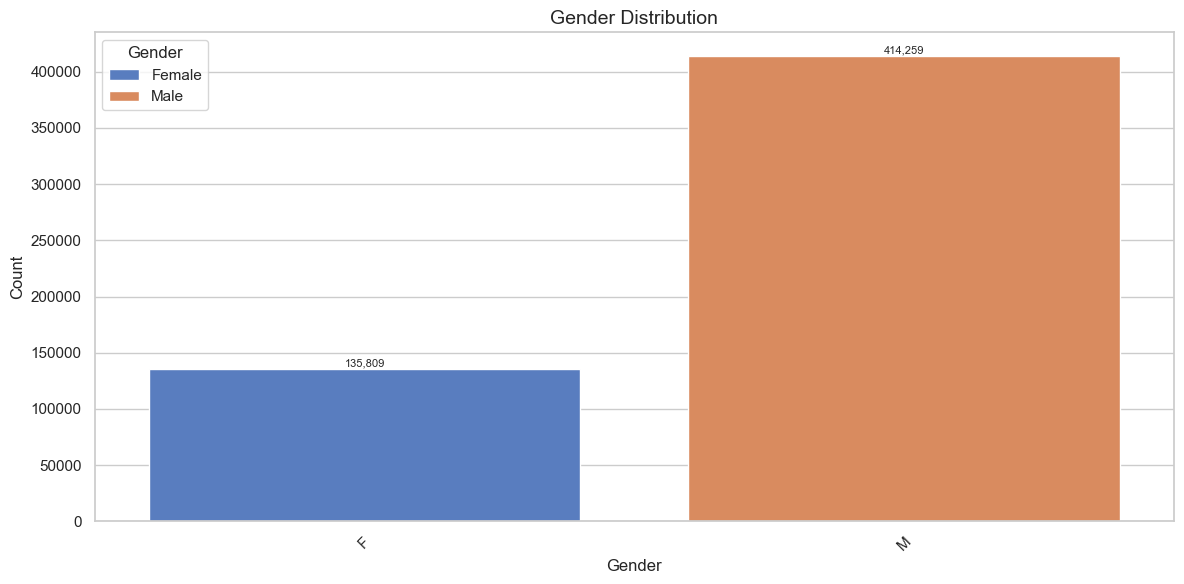

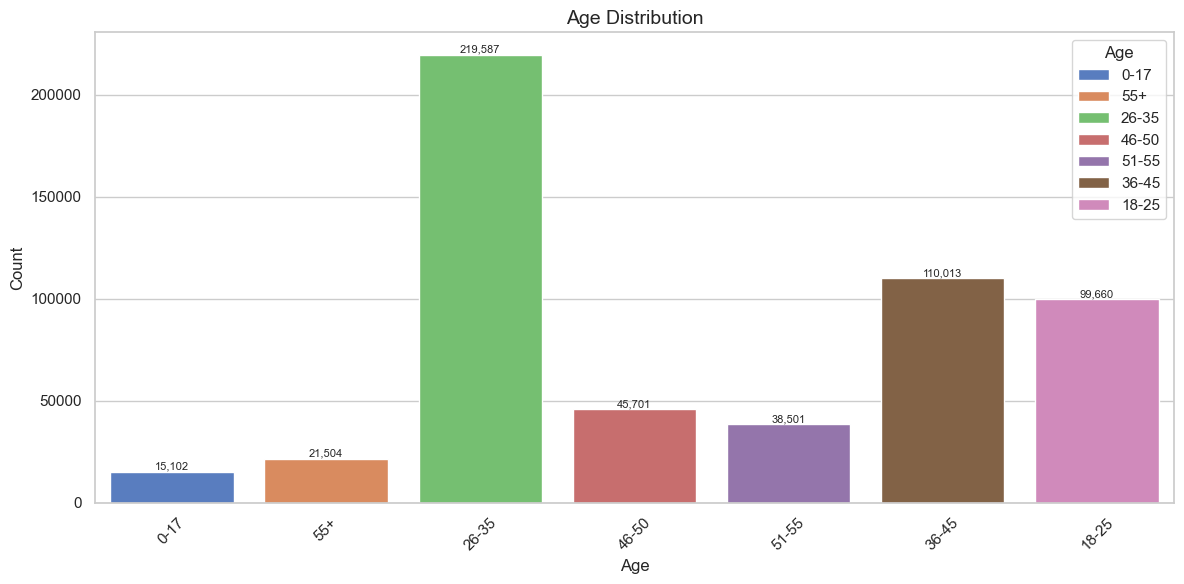

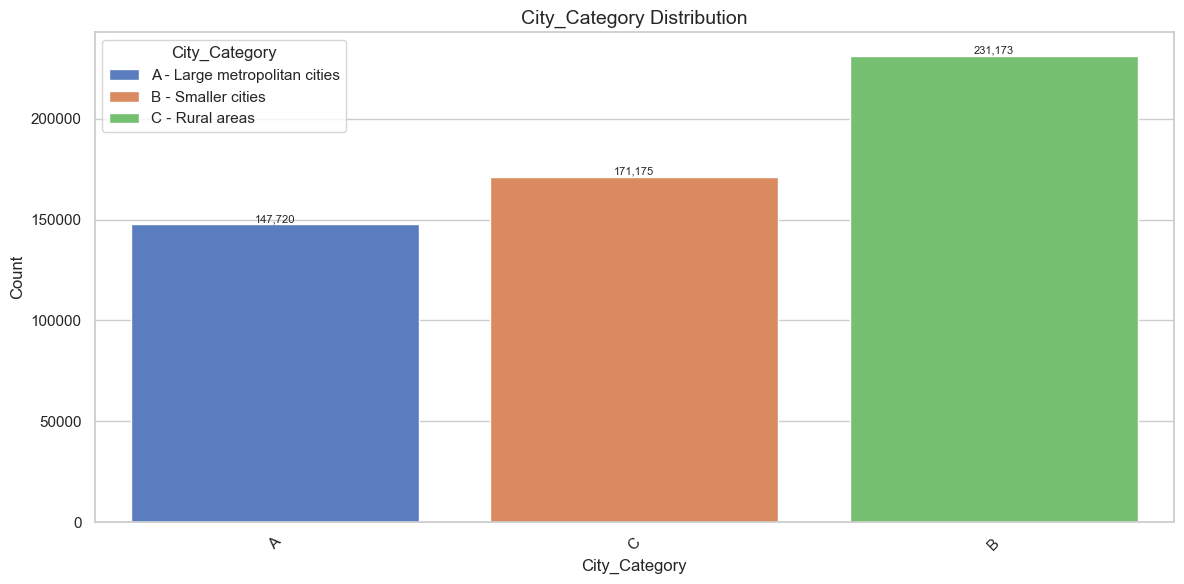

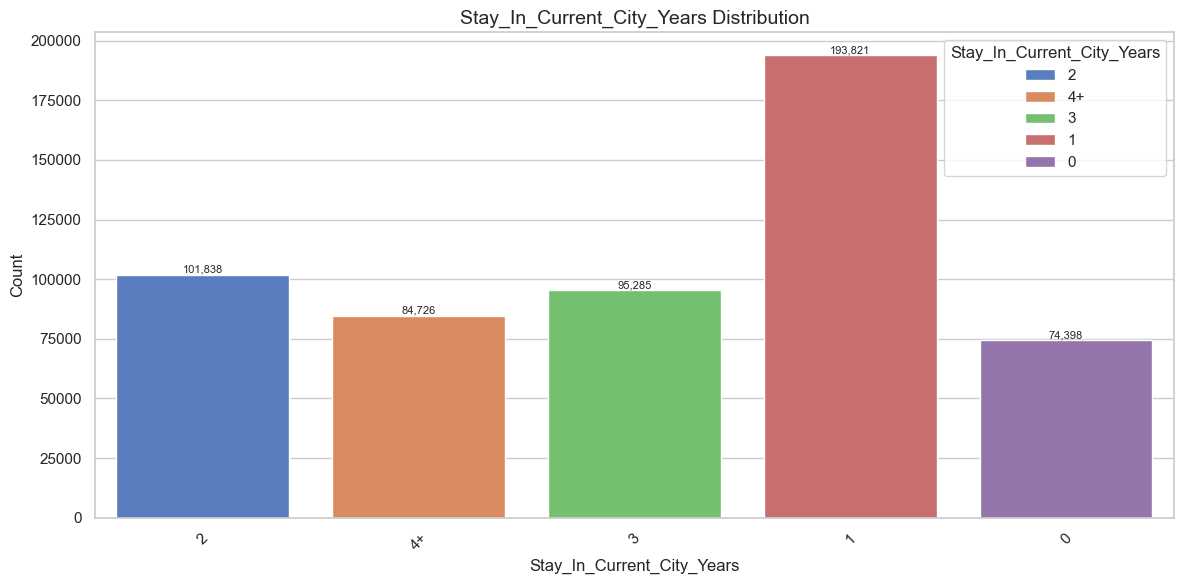

2024-07-28 09:25:35,559 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-28 09:25:35,811 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


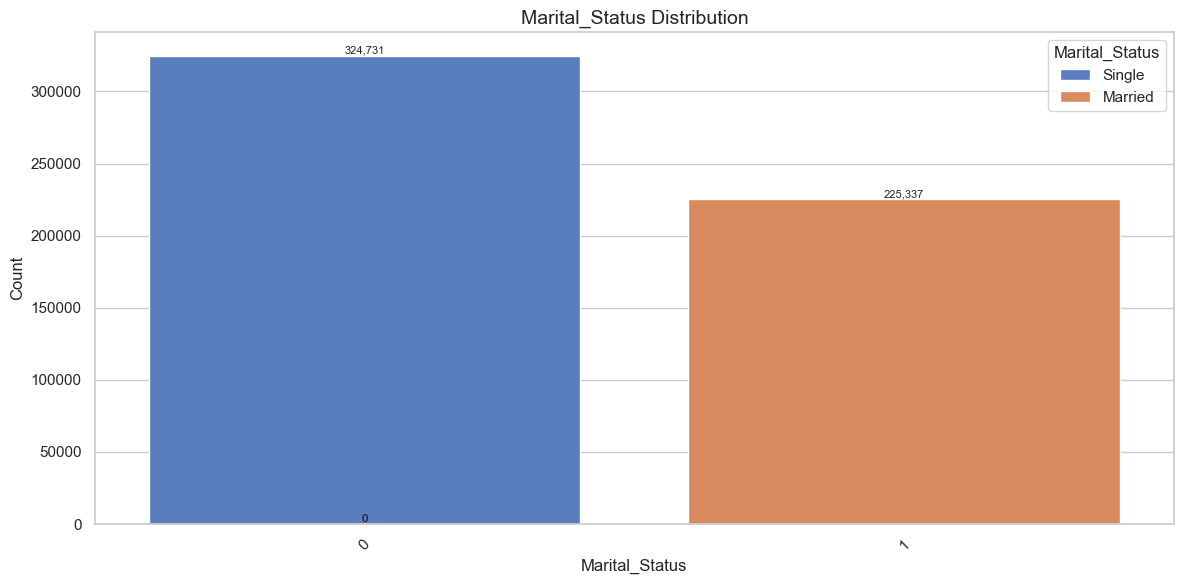

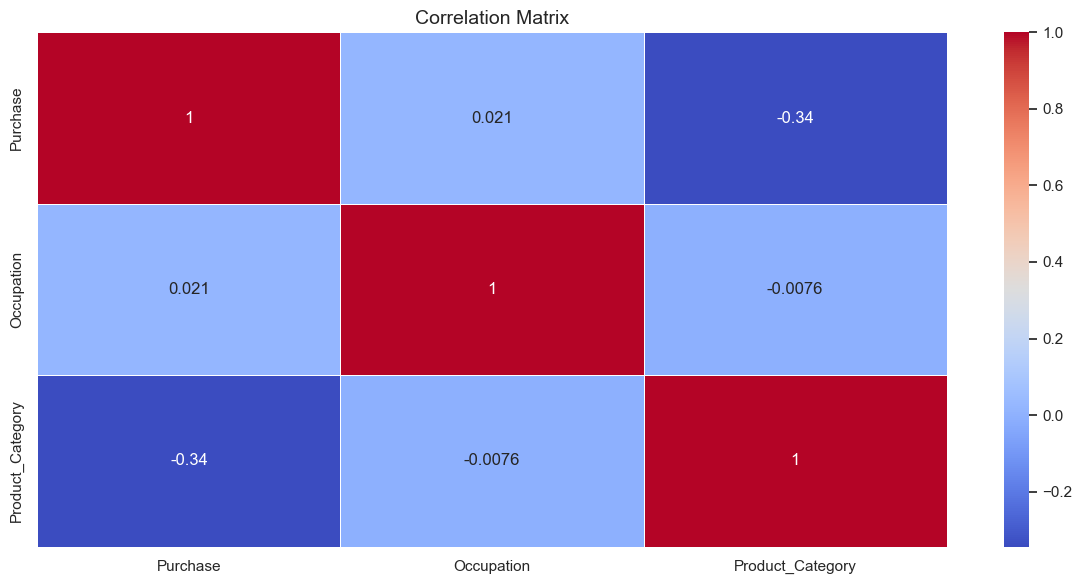

2024-07-28 09:25:36,983 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-28 09:25:37,329 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


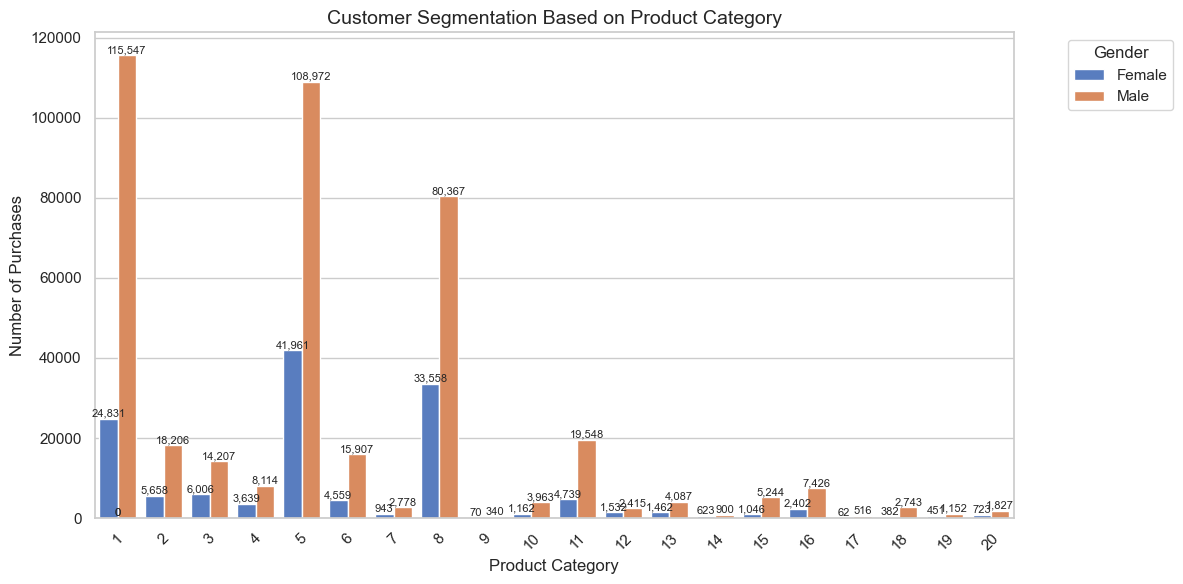

Data analysis completed.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Load data
df = pd.read_csv('Walmart_cleaned.csv')

# Remove textual columns not used in the model
df.drop(columns=['User_ID', 'Product_ID'], inplace=True)

# Check and clean the data
df.dropna(inplace=True)

# Convert columns to appropriate types
numeric_cols = ['Purchase', 'Occupation', 'Product_Category']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Function to add labels to bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Function to plot categorical variable distribution
def plot_categorical_distribution(df, var):
    plt.figure()
    ax = sns.countplot(data=df, x=var, palette='muted', hue=var)
    add_labels(ax)
    plt.title(f'{var} Distribution', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    if var == 'City_Category':
        legend_labels = ['A - Large metropolitan cities', 'B - Smaller cities', 'C - Rural areas']
    elif var == 'Gender':
        legend_labels = ['Female', 'Male']
    elif var == 'Marital_Status':
        legend_labels = ['Single', 'Married']
    else:
        legend_labels = df[var].unique()
    plt.legend(title=var, labels=legend_labels)
    plt.tight_layout()
    plt.show()

# Exploratory Data Analysis (EDA)

# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

# Distribution of categorical variables
categorical_vars = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

for var in categorical_vars:
    plot_categorical_distribution(df, var)

# Correlation matrix for numeric columns
plt.figure()
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

# Customer segmentation based on product category
plt.figure()
ax = sns.countplot(x='Product_Category', hue='Gender', data=df, palette='muted')
add_labels(ax)
plt.title('Customer Segmentation Based on Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()

print('Data analysis completed.')



# 📊 **SQL Queries for Walmart Data Analysis**

## 📝 **Script Description**
This SQL file contains a set of queries designed to analyze and draw insights from the `walmart_data` dataset. Below is a summary of each query included in the file:

1. **Retrieve Sample Data**:
   - **Query**: `SELECT * FROM walmart_data LIMIT 10;`
   - **Description**: Retrieves the first 10 rows from the `walmart_data` table to provide a sample of the data.

2. **Average Purchase Value by City**:
   - **Query**: `SELECT City_Category, AVG(Purchase) AS Avg_Purchase FROM walmart_data GROUP BY City_Category;`
   - **Description**: Calculates the average purchase value for each city category.

3. **Total Purchases by City and Gender**:
   - **Query**: `SELECT City_Category, Gender, SUM(Purchase) AS Total_Purchase FROM walmart_data GROUP BY City_Category, Gender;`
   - **Description**: Calculates the total purchase value for each city category, further broken down by gender.

4. **Most Popular Product Category by City**:
   - **Query**: `SELECT City_Category, Product_Category, COUNT(*) AS Product_Count FROM walmart_data GROUP BY City_Category, Product_Category ORDER BY City_Category, Product_Count DESC;`
   - **Description**: Identifies the most frequently purchased product category in each city.

5. **Average Purchase Value by Age and Marital Status**:
   - **Query**: `SELECT Age, Marital_Status, AVG(Purchase) AS Avg_Purchase FROM walmart_data GROUP BY Age, Marital_Status;`
   - **Description**: Determines the average purchase value broken down by age group and marital status.

6. **Average Purchase Value by Product Category**:
   - **Query**: `SELECT Product_Category, AVG(Purchase) AS Avg_Purchase FROM walmart_data GROUP BY Product_Category;`
   - **Description**: Calculates the average purchase value for each product category.

7. **Purchase Analysis by Length of Stay in Current City**:
   - **Query**: `SELECT Stay_In_Current_City_Years, AVG(Purchase) AS Avg_Purchase FROM walmart_data GROUP BY Stay_In_Current_City_Years;`
   - **Description**: Calculates the average purchase value based on the length of stay in the current city.

8. **Highest and Lowest Purchases by Occupation**:
   - **Query**: `SELECT Occupation, MAX(Purchase) AS Max_Purchase, MIN(Purchase) AS Min_Purchase FROM walmart_data GROUP BY Occupation;`
   - **Description**: Returns the highest and lowest purchase values for each occupation group.

9. **Number of Purchases by Product Category and Age**:
   - **Query**: `SELECT Product_Category, Age, COUNT(*) AS Purchase_Count FROM walmart_data GROUP BY Product_Category, Age;`
   - **Description**: Returns the number of purchases for each product category in each age group.

## 🎯 **Script Purpose**
The SQL script aims to conduct various analyses on the Walmart dataset, helping to discover trends and patterns related to purchases across different segments.

## 📂 **Script Structure**
Each query in the SQL file is designed to provide specific insights into various aspects of Walmart's sales data, such as average purchase value, total purchases, most popular product categories, and more.

### 🛠️ **Sample Queries and Their Results**
- **Retrieve Sample Data**: This query retrieves the first 10 rows from the `walmart_data` table, allowing for a quick overview of the data.
- **Average Purchase Value by City**: This query calculates the average purchase value for each city category, helping to understand differences in purchasing habits between cities.

### 💡 **Tips and Further Analysis**
Data analysis in the SQL file can be extended with additional queries that analyze purchase patterns in more detail, such as different seasons or days of the week. More advanced analytical techniques, such as regression analysis or clustering, can also be applied to gain deeper insights into the data.

---


# 🛠️ **Script: run_queries_sqlalchemy.py**

## 📝 **Script Description**
This script is used to perform Walmart sales data analysis using SQL queries. The script follows these steps:
1. Loads the configuration from a JSON file.
2. Creates a MySQL database engine using SQLAlchemy.
3. Loads SQL queries from a file.
4. Executes the queries and saves the results to CSV files.

## 🎯 **Script Purpose**
The purpose of the script is to conduct exploratory data analysis (EDA) on Walmart sales data and save the results to CSV files.

## 🛠️ **Key Functions and Their Operations**

### 🔹 **load_config(config_file='config.json')**
Loads the configuration from a JSON file.

- **Parameters:**
  - `config_file` (str): Path to the JSON configuration file. Default value is `'config.json'`.

- **Returns:**
  - dict: Dictionary containing the configuration information.

### 🔹 **create_db_engine(config)**
Creates a MySQL database engine using the configuration.

- **Parameters:**
  - `config` (dict): Dictionary containing the configuration information.

- **Returns:**
  - SQLAlchemy Engine: Database engine.

### 🔹 **read_queries(file_path)**
Loads SQL queries from a file and returns them as a list.

- **Parameters:**
  - `file_path` (str): Path to the file containing SQL queries.

- **Returns:**
  - list: List of SQL queries.

### 🔹 **execute_queries_and_save_to_csv(queries, engine)**
Executes SQL queries and saves the results to CSV files.

- **Parameters:**
  - `queries` (list): List of SQL queries.
  - `engine` (SQLAlchemy Engine): Database engine.

---

## 📈 **Analysis Results**
The results of the SQL queries are saved to CSV files named `query_result_1.csv`, `query_result_2.csv`, and so on. Each file contains the results of the corresponding query.


In [14]:
import os
import logging
from sqlalchemy import create_engine, text
import pandas as pd
import json

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def load_config(config_file='config.json'):
    """Loads the JSON configuration file."""
    try:
        with open(config_file, 'r') as file:
            config = json.load(file)
        logging.info("Configuration loaded successfully.")
        print("Configuration loaded successfully.")
        return config
    except Exception as e:
        logging.error(f"Failed to load configuration: {e}")
        print(f"Failed to load configuration: {e}")
        raise

def create_db_engine(config):
    """Creates a database engine based on the provided configuration."""
    try:
        db_url = f"mysql+mysqlconnector://{config['username']}:{config['password']}@{config['host']}/{config['database']}"
        engine = create_engine(db_url)
        logging.info("Database engine created successfully.")
        print("Database engine created successfully.")
        return engine
    except Exception as e:
        logging.error(f"Failed to create database engine: {e}")
        print(f"Failed to create database engine: {e}")
        raise

def read_queries(file_path):
    """Reads SQL queries from the specified file."""
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            queries = file.read().split(';')
        # Remove empty queries
        queries = [query.strip() for query in queries if query.strip()]
        logging.info(f"{len(queries)} queries read from {file_path}.")
        print(f"{len(queries)} queries read from {file_path}.")
        return queries
    except Exception as e:
        logging.error(f"Failed to read queries from {file_path}: {e}")
        print(f"Failed to read queries from {file_path}: {e}")
        raise

def execute_queries_and_save_to_csv(queries, engine):
    """Executes SQL queries and saves the results to CSV files."""
    try:
        with engine.connect() as connection:
            for i, query in enumerate(queries):
                result = connection.execute(text(query))
                df = pd.DataFrame(result.fetchall(), columns=result.keys())
                csv_file = f'query_result_{i + 1}.csv'
                df.to_csv(csv_file, index=False)
                logging.info(f"Query {i + 1} executed and results saved to {csv_file}.")
                print(f"Query {i + 1} executed and results saved to {csv_file}.")
    except Exception as e:
        logging.error(f"Failed to execute queries and save results: {e}")
        print(f"Failed to execute queries and save results: {e}")
        raise

if __name__ == '__main__':
    try:
        # Load configuration
        config = load_config()
        # Create database engine
        engine = create_db_engine(config)
        # Read queries from file
        queries = read_queries('queries.sql')
        # Execute queries and save results to CSV
        execute_queries_and_save_to_csv(queries, engine)
    except Exception as e:
        logging.error(f"An error occurred: {e}")
        print(f"An error occurred: {e}")


2024-07-28 09:25:47,829 - INFO - Configuration loaded successfully.
2024-07-28 09:25:47,831 - INFO - Database engine created successfully.
2024-07-28 09:25:47,848 - INFO - 9 queries read from queries.sql.
2024-07-28 09:25:47,902 - INFO - Query 1 executed and results saved to query_result_1.csv.


Configuration loaded successfully.
Database engine created successfully.
9 queries read from queries.sql.
Query 1 executed and results saved to query_result_1.csv.


2024-07-28 09:25:48,822 - INFO - Query 2 executed and results saved to query_result_2.csv.


Query 2 executed and results saved to query_result_2.csv.


2024-07-28 09:25:50,101 - INFO - Query 3 executed and results saved to query_result_3.csv.


Query 3 executed and results saved to query_result_3.csv.


2024-07-28 09:25:50,990 - INFO - Query 4 executed and results saved to query_result_4.csv.


Query 4 executed and results saved to query_result_4.csv.


2024-07-28 09:25:51,981 - INFO - Query 5 executed and results saved to query_result_5.csv.


Query 5 executed and results saved to query_result_5.csv.


2024-07-28 09:25:52,522 - INFO - Query 6 executed and results saved to query_result_6.csv.


Query 6 executed and results saved to query_result_6.csv.


2024-07-28 09:25:53,444 - INFO - Query 7 executed and results saved to query_result_7.csv.


Query 7 executed and results saved to query_result_7.csv.


2024-07-28 09:25:53,898 - INFO - Query 8 executed and results saved to query_result_8.csv.


Query 8 executed and results saved to query_result_8.csv.


2024-07-28 09:25:54,787 - INFO - Query 9 executed and results saved to query_result_9.csv.


Query 9 executed and results saved to query_result_9.csv.


# 🛠️ **Script: run_queries_sqlalchemy.py**

## 📝 **Script Description**
This script is used to analyze purchase data based on the results of SQL queries saved in CSV files. The script follows these steps:
1. Loads data from CSV files.
2. Performs data analysis.
3. Creates charts based on the analysis results.

## 🎯 **Script Purpose**
The purpose of the script is to conduct exploratory data analysis (EDA) on purchase data and visualize the results in the form of charts.

---

## 🛠️ **Key Functions and Their Operations**

### 🔹 **Load Data**
- Data is loaded from CSV files using the `load_data` function.
- Check if all files are loaded correctly.

### 🔹 **Parameters**
- `data` (pandas.DataFrame): Data for visualization.
- `x_col` (str): Name of the column for the X-axis.
- `y_col` (str): Name of the column for the Y-axis.
- `hue_col` (str, optional): Name of the column for color grouping. Default is `None`.
- `title` (str, optional): Title of the chart. Default is an empty string.
- `xlabel` (str, optional): Label for the X-axis. Default is an empty string.
- `ylabel` (str, optional): Label for the Y-axis. Default is an empty string.
- `palette` (str, optional): Color palette. Default is 'viridis'.
- `legend_labels` (list, optional): Labels for the legend. Default is `None`.

### 🔹 **Data Analysis**
- Display the average purchase value for each city.
- Analyze the total purchase value for each city by gender.
- Identify the most popular product category for each city.
- Analyze the average purchase value by age and marital status.

### 🔹 **Results Visualization**
- Generate bar charts for various analyses, including:
  - Average purchase value for each city category.
  - Total purchase value for each city category by gender.
  - Average purchase value by age and marital status.
  - Average purchase value for each product category.
  - Purchase analysis based on years spent in the current city.
  - Maximum and minimum purchase values by occupation.


Average purchase value for each city:
  City_Category  Avg_Purchase
0             A     8911.9392
1             C     9719.9210
2             B     9151.3006

Total purchase for each city by gender:
  City_Category Gender  Total_Purchase
0             A      F       306329915
1             C      M      1277521757
2             A      M      1010141746
3             B      M      1621916597
4             B      F       493617008
5             C      F       386285719

Most popular product category for each city:
   City_Category  Product_Category  Product_Count
0              A                 5          42211
1              A                 1          35081
2              A                 8          32179
3              A                11           6601
4              A                 2           6141
5              A                 6           5507
6              A                 3           4943
7              A                 4           3050
8              A                

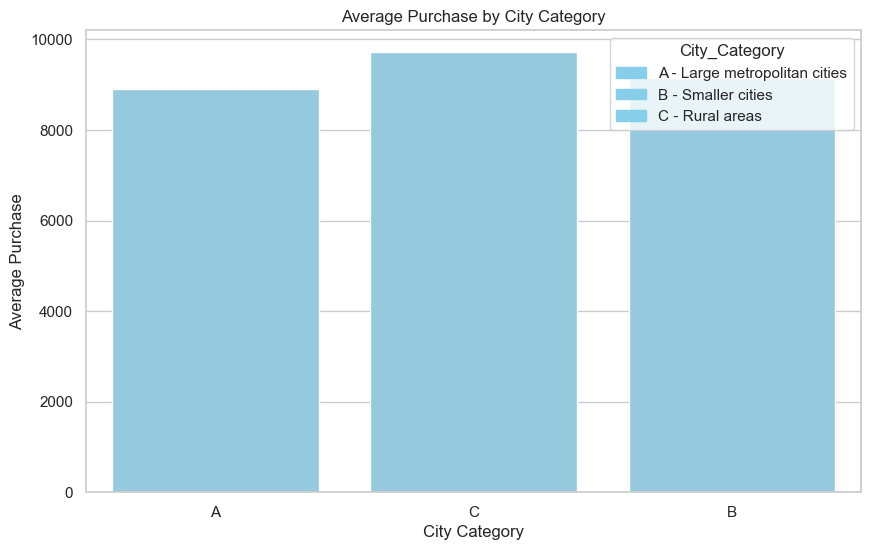

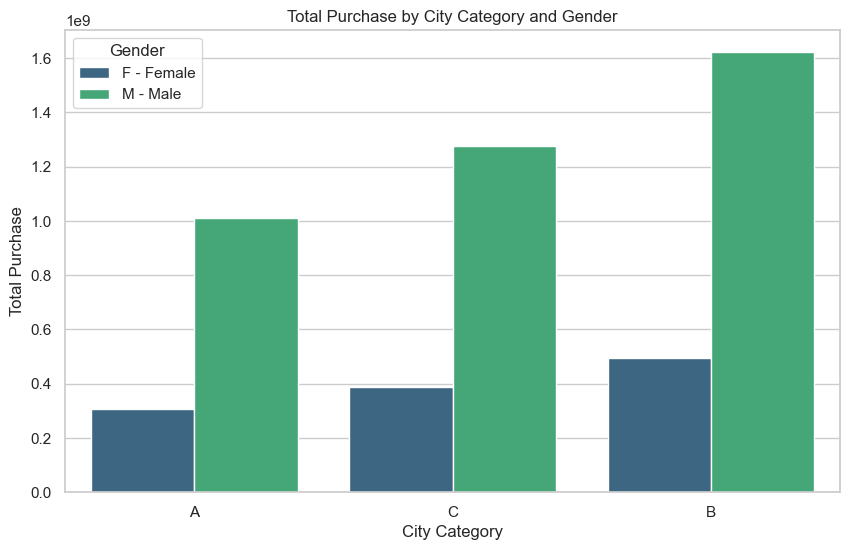

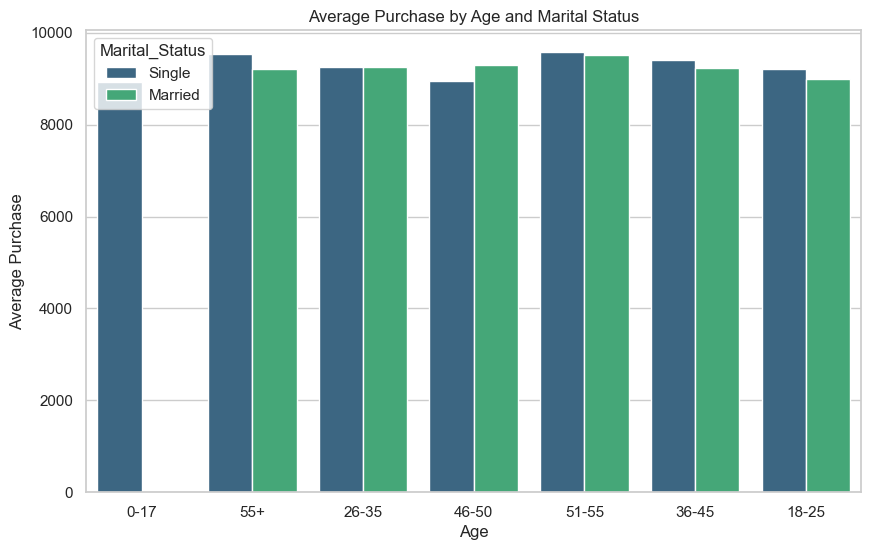

2024-07-28 09:26:05,410 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-28 09:26:05,414 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


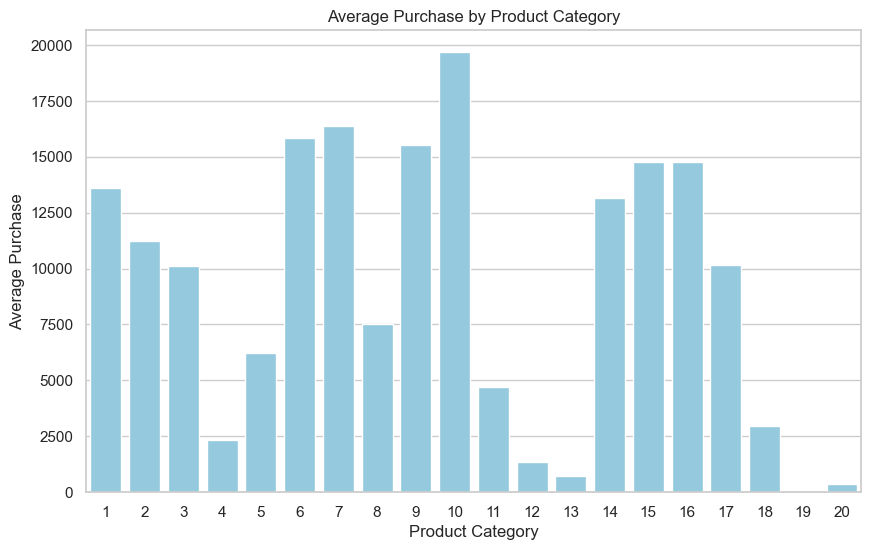

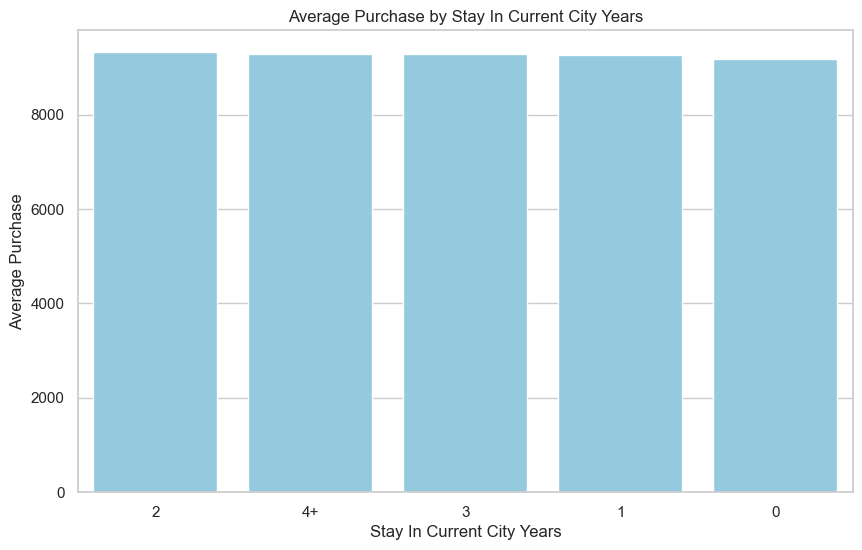

2024-07-28 09:26:05,832 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-28 09:26:05,838 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


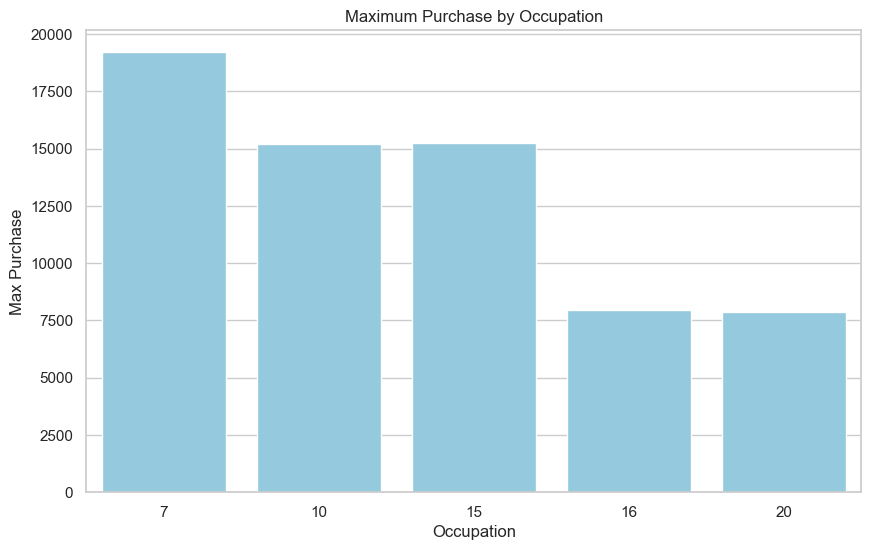

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Function to load data
def load_data(file_name):
    if os.path.exists(file_name):
        return pd.read_csv(file_name)
    else:
        print(f"File {file_name} does not exist.")
        return None

# Function to create bar plots with optional legend
def create_bar_plot(data, x_col, y_col, hue_col=None, title='', xlabel='', ylabel='', palette='viridis',
                    legend_labels=None):
    plt.figure(figsize=(10, 6))
    if hue_col:
        plot = sns.barplot(data=data, x=x_col, y=y_col, hue=hue_col, palette=palette)
        if legend_labels:
            handles, labels = plot.get_legend_handles_labels()
            plt.legend(handles, legend_labels, title=hue_col)
    else:
        sns.barplot(data=data, x=x_col, y=y_col, color='skyblue')
        if legend_labels:
            handles = [plt.Rectangle((0, 0), 1, 1, color='skyblue') for _ in legend_labels]
            plt.legend(handles, legend_labels, title=x_col)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Load data from CSV files generated by SQL
dfs = [load_data(f'query_result_{i}.csv') for i in range(1, 10)]

# Check if all dataframes are loaded successfully
dfs = [df for df in dfs if df is not None]

# Data analysis
print("Average purchase value for each city:")
print(dfs[1])

print("\nTotal purchase for each city by gender:")
print(dfs[2])

print("\nMost popular product category for each city:")
print(dfs[3])

print("\nAverage purchase value by age and marital status:")
print(dfs[4])

# Visualization of results
# Average purchase value for each city with custom legend
city_legend_labels = ['A - Large metropolitan cities', 'B - Smaller cities', 'C - Rural areas']
create_bar_plot(dfs[1], 'City_Category', 'Avg_Purchase', title='Average Purchase by City Category',
                xlabel='City Category', ylabel='Average Purchase', legend_labels=city_legend_labels)

# Total purchase for each city by gender with custom legend
gender_legend_labels = ['F - Female', 'M - Male']
create_bar_plot(dfs[2], 'City_Category', 'Total_Purchase', hue_col='Gender',
                title='Total Purchase by City Category and Gender', xlabel='City Category', ylabel='Total Purchase',
                legend_labels=gender_legend_labels)

# Average purchase value by age and marital status with custom legend
marital_status_legend_labels = ['Single', 'Married']
create_bar_plot(dfs[4], 'Age', 'Avg_Purchase', hue_col='Marital_Status',
                title='Average Purchase by Age and Marital Status', xlabel='Age', ylabel='Average Purchase',
                legend_labels=marital_status_legend_labels)

# Average purchase value for each product category
create_bar_plot(dfs[5], 'Product_Category', 'Avg_Purchase', title='Average Purchase by Product Category',
                xlabel='Product Category', ylabel='Average Purchase')

# Purchase analysis based on years spent in the city
create_bar_plot(dfs[6], 'Stay_In_Current_City_Years', 'Avg_Purchase',
                title='Average Purchase by Stay In Current City Years', xlabel='Stay In Current City Years',
                ylabel='Average Purchase')

# Calculate maximum and minimum purchase by occupation from DataFrame 1
occupation_stats = dfs[0].groupby('Occupation')['Purchase'].agg(['max', 'min']).reset_index()
occupation_stats.columns = ['Occupation', 'Max_Purchase', 'Min_Purchase']

# Maximum and Minimum Purchase by Occupation
create_bar_plot(occupation_stats, 'Occupation', 'Max_Purchase', title='Maximum Purchase by Occupation',
                xlabel='Occupation', ylabel='Max Purchase')


# 📊 **Purchase Data Analysis**

## 📈 **Overview of Charts and Conclusions**

### Chart 1: Average Purchase by City Category

**Description:** This chart shows the average purchase value by city category:
- **A:** Large metropolitan cities
- **B:** Smaller cities
- **C:** Rural areas

**Conclusions:** The average purchase value is highest in rural areas (C) and lowest in large metropolitan cities (A). This may suggest differences in shopping behaviors depending on the size and characteristics of the city.

### Chart 2: Total Purchase by City Category and Gender

**Description:** This chart shows the total purchase value by city category and gender:
- **F:** Female
- **M:** Male

**Conclusions:** Males make larger purchases in all city categories. The biggest difference is seen in smaller cities (B), where males spend significantly more than females.

### Chart 3: Average Purchase by Age and Marital Status

**Description:** This chart shows the average purchase value by age and marital status:
- **Single:** Single
- **Married:** Married

**Conclusions:** Average spending is similar across different age groups and slightly varies by marital status. In the 55+ age group, single individuals spend more than married individuals.

### Chart 4: Average Purchase by Product Category

**Description:** This chart shows the average purchase value by product category.

**Conclusions:** The highest average spending is observed in product categories 6, 7, and 10. This may indicate that these product categories are the most popular or the most expensive.

### Chart 5: Average Purchase by Stay In Current City Years

**Description:** This chart shows the average purchase value by the number of years spent in the current city.

**Conclusions:** The average purchase value is relatively constant regardless of the number of years spent in the current city, suggesting that the length of stay in the city does not have a significant impact on spending.

### Chart 6: Maximum Purchase by Occupation

**Description:** This chart shows the maximum purchase value by occupation.

**Conclusions:** The highest maximum spending is observed in occupations labeled as 7, 10, and 15. This may suggest that individuals in these occupations have higher financial capabilities or greater shopping needs.


# 📊 **Summary**

During the analysis of Walmart sales data, we took several key steps to thoroughly examine and understand the data. Here are the main findings and results of our analysis:

## 🧹 **Data Cleaning**
- Missing values were removed, and the data was normalized, ensuring consistency and data integrity for further analysis.

## 📥 **Data Import**
- Data was successfully imported into the SQL database, facilitating the management of large datasets and enabling efficient query processing.

## 🔍 **Data Verification**
- Data verification was conducted to ensure that the imported data met expectations and was free of errors.

## 🔎 **Exploratory Analysis**
- An exploratory data analysis was performed, including visualizations and descriptive statistics, which helped identify key patterns and trends in the sales data.

## 📈 **Findings**
- The analysis revealed significant insights into the impact of gender, age, city size, and marital status on purchasing behaviors.
- Products that have the greatest impact on overall sales performance were also identified.

# 📝 **Final Conclusions**
Our analysis provided valuable information that can aid in making better business decisions, optimizing sales strategies, and gaining a better understanding of market dynamics. Further analyses may include more advanced predictive models and the exploration of additional variables that may influence sales.
